<a href="https://colab.research.google.com/github/sazio/Battleship/blob/master/Trajectories%26Levy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#!pip install traja

In [149]:
import numpy as np
import pandas as pd 
import traja
import glob
import re
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [136]:
path_to_files = "drive/MyDrive/JamesSimoneSpatial/TrackFilesCue/CueCsv/Track/"

trackFiles = []
trackFiles = sorted(glob.glob(path_to_files + '*Track.csv'))

In [138]:
probeFiles = []

# Filtering probe trials 
# if probeFilter = True, probetrials are not used in the future statistics
# if probeFilter = False, probetrials are going to take part in the stats
probeFilter = True 

if probeFilter == True:
    regExpr = re.compile(r'p_Track')
    probeFiles = list(filter(lambda i : regExpr.search(i), trackFiles))
    trackFiles = list(filter(lambda i : not regExpr.search(i), trackFiles))
    
else : 
    trackFiles = trackFiles 

In [139]:
trackData = []
for i in tqdm(range(0,len(trackFiles))) : 
    trackData.append(pd.read_csv(trackFiles[i], names = ["time", "x", "y", "HeadAngle","EODRate","DistanceXEODPulse",
                                                         "HeadSpeed", "DistanceXESCAN"]))
    """_Track.csv files:
    Columns: T(s), X(m), Y(m), A(deg), R(Hz), D(m), V(m/s), S(m):
    T: camera frame time
    X: x coordinate of the head tip @ grid frame of reference
    Y: y coordinate of the head tip @ grid frame of reference
    A: head orientation
    R: EOD rate
    D: Distance per EOD pulse (=1/sampling_density)
    V: Head speed (m/s, signed)
    S: Distance per Escan (=1/escan_density)"""

In [140]:
# Creating list of probe Data as list of pandas dataframes 
probeData = []
for i in tqdm(range(0,len(probeFiles))) : 
    probeData.append(pd.read_csv(probeFiles[i], names = ["time", "x", "y", "HeadAngle","EODRate","DistanceXEODPulse",
                                                         "HeadSpeed", "DistanceXESCAN"]))

In [141]:
traja_steps = []
for i in tqdm(range(0, len(trackFiles[:19]))):

  trajaDF = traja.TrajaDataFrame(trackData[i])
  pivot = traja.step_lengths(trajaDF).dropna()
  pivot = pivot[pivot!= 0]

  traja_steps.append(pivot)

In [146]:
early_steps = traja_steps[0]

for i in tqdm(range(1,17)):
  early_steps = early_steps.append(traja_steps[i], ignore_index= True)

In [153]:
import scipy.stats as st

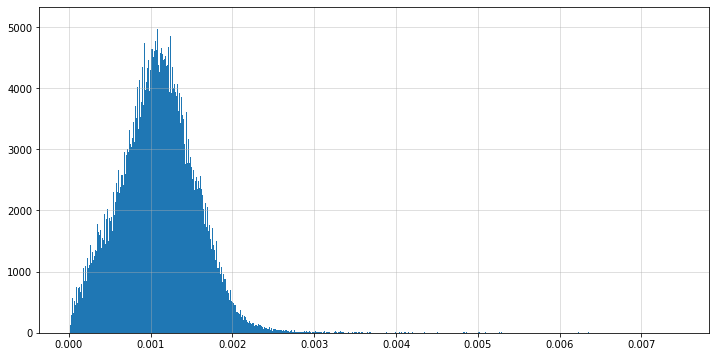

In [186]:
plt.figure(figsize = (12,6))
counts, bins, bars = plt.hist(early_steps, bins = int(np.sqrt(early_steps.shape[0])))
plt.grid(alpha = 0.5)

In [204]:
pconv = lambda alpha, beta, mu, sigma: (alpha, beta, mu - sigma * beta * np.tan(np.pi * alpha / 2.0), sigma)
alpha, beta, mu, sigma = pconv(*st.levy_stable._fitstart(counts))
print(alpha, beta, mu, sigma)

0.8421482305851353 1.0 -129.30318029818656 32.734725714652726


In [228]:
early_steps = early_steps*10000

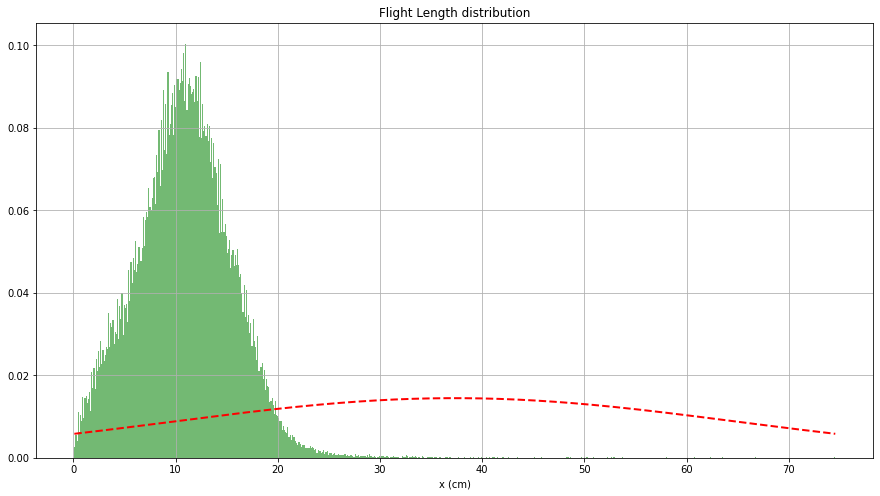

In [229]:
plt.figure(figsize = (15,8))
#n, bins, patches = plt.hist(x, int(np.sqrt(x.shape[0])), density = True, facecolor='green', alpha=0.55)
counts, bins, bars = plt.hist(early_steps, bins = int(np.sqrt(early_steps.shape[0])), density = True, facecolor='green', alpha=0.55)
# add a 'best fit' line
#y = norm.pdf( bins, *norm._fitstart(bins))
y = st.levy_stable.pdf(bins,*st.levy_stable._fitstart(bins))

l = plt.plot(bins, y, 'r--', linewidth=2)


plt.title("Flight Length distribution")
plt.xlabel('x (cm)')
plt.ylabel('')

plt.grid(True)

plt.show()

In [236]:
def levy_distrib(x,mu = 2,c = 1):
  return np.sqrt(c/2*np.pi)*np.exp(-(c/(2*(x-mu))))/((x-mu)*np.sqrt(x-mu))

In [237]:
from scipy.optimize import curve_fit 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


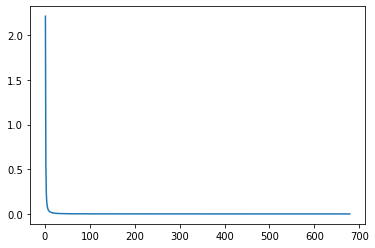

In [222]:
bins

array([1.00000000e-05, 2.09639600e-05, 3.19279200e-05, 4.28918799e-05,
       5.38558399e-05, 6.48197999e-05, 7.57837599e-05, 8.67477198e-05,
       9.77116798e-05, 1.08675640e-04, 1.19639600e-04, 1.30603560e-04,
       1.41567520e-04, 1.52531480e-04, 1.63495440e-04, 1.74459400e-04,
       1.85423360e-04, 1.96387320e-04, 2.07351280e-04, 2.18315240e-04,
       2.29279200e-04, 2.40243160e-04, 2.51207120e-04, 2.62171079e-04,
       2.73135039e-04, 2.84098999e-04, 2.95062959e-04, 3.06026919e-04,
       3.16990879e-04, 3.27954839e-04, 3.38918799e-04, 3.49882759e-04,
       3.60846719e-04, 3.71810679e-04, 3.82774639e-04, 3.93738599e-04,
       4.04702559e-04, 4.15666519e-04, 4.26630479e-04, 4.37594439e-04,
       4.48558399e-04, 4.59522359e-04, 4.70486319e-04, 4.81450279e-04,
       4.92414239e-04, 5.03378199e-04, 5.14342159e-04, 5.25306119e-04,
       5.36270079e-04, 5.47234039e-04, 5.58197999e-04, 5.69161959e-04,
       5.80125919e-04, 5.91089879e-04, 6.02053839e-04, 6.13017799e-04,
      